<a href="https://colab.research.google.com/github/KimsengHouy/DataVisualization_bar_chart_race/blob/main/ITE353_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**


This report represents my data visualization for the Most Popular Programming from 2004 to 2021.

**1. Importing Libraries and Looking for Data**

In [ ]:
!pip install bar_chart_race

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade IPython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import bar_chart_race as bcr   # use pip install bar_chart_race in console to install this package
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Video

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data.csv')

**2. Analysing Data**

In [ ]:
df.head()

Date  Abap   Ada  C/C++  ...  Swift  TypeScript   VBA  Visual Basic
0       July 2004  0.34  0.36  10.08  ...    0.0         0.0  1.44          8.56
1     August 2004  0.36  0.36   9.81  ...    0.0         0.0  1.46          8.57
2  September 2004  0.41  0.41   9.63  ...    0.0         0.0  1.55          8.41
3    October 2004  0.40  0.38   9.50  ...    0.0         0.0  1.61          8.49
4   November 2004  0.38  0.38   9.52  ...    0.0         0.0  1.50          8.24

[5 rows x 29 columns]

In [ ]:
df.tail()

Date  Abap   Ada  C/C++  ...  Swift  TypeScript   VBA  Visual Basic
202        May 2021  0.58  0.82   6.56  ...   2.07        1.91  1.26          0.62
203       June 2021  0.58  0.83   6.40  ...   2.17        1.96  1.18          0.62
204       July 2021  0.59  0.93   6.25  ...   2.12        2.07  1.17          0.68
205     August 2021  0.53  0.89   6.30  ...   2.21        2.13  1.28          0.72
206  September 2021  0.53  0.78   6.49  ...   2.10        2.18  1.22          0.75

[5 rows x 29 columns]

In [ ]:
df = df.set_index('Date')

In [ ]:
df.head()

Abap   Ada  C/C++    C#  ...  Swift  TypeScript   VBA  Visual Basic
Date                                     ...                                       
July 2004       0.34  0.36  10.08  4.71  ...    0.0         0.0  1.44          8.56
August 2004     0.36  0.36   9.81  4.99  ...    0.0         0.0  1.46          8.57
September 2004  0.41  0.41   9.63  5.06  ...    0.0         0.0  1.55          8.41
October 2004    0.40  0.38   9.50  5.31  ...    0.0         0.0  1.61          8.49
November 2004   0.38  0.38   9.52  5.24  ...    0.0         0.0  1.50          8.24

[5 rows x 28 columns]

In [ ]:
df.columns

Index(['Abap', 'Ada', 'C/C++', 'C#', 'Cobol', 'Dart', 'Delphi/Pascal', 'Go',
       'Groovy', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lua',
       'Matlab', 'Objective-C', 'Perl', 'PHP', 'Python', 'R', 'Ruby', 'Rust',
       'Scala', 'Swift', 'TypeScript', 'VBA', 'Visual Basic'],
      dtype='object')

In [ ]:
i = df.loc['July 2004']
i

Abap              0.34
Ada               0.36
C/C++            10.08
C#                4.71
Cobol             0.43
Dart              0.00
Delphi/Pascal     2.82
Go                0.00
Groovy            0.03
Haskell           0.22
Java             30.37
JavaScript        8.65
Julia             0.00
Kotlin            0.00
Lua               0.16
Matlab            2.11
Objective-C       0.19
Perl              7.38
PHP              18.75
Python            2.53
R                 0.39
Ruby              0.33
Rust              0.08
Scala             0.03
Swift             0.00
TypeScript        0.00
VBA               1.44
Visual Basic      8.56
Name: July 2004, dtype: float64

In [ ]:
i.sum()

99.96

In [ ]:
j = df.loc['June 2018']
j

Abap              0.51
Ada               0.36
C/C++             6.05
C#                7.78
Cobol             0.34
Dart              0.17
Delphi/Pascal     0.27
Go                0.85
Groovy            0.48
Haskell           0.32
Java             21.87
JavaScript        8.41
Julia             0.18
Kotlin            0.92
Lua               0.42
Matlab            2.25
Objective-C       3.40
Perl              0.76
PHP               7.93
Python           22.62
R                 4.10
Ruby              1.66
Rust              0.36
Scala             1.18
Swift             2.75
TypeScript        1.47
VBA               1.38
Visual Basic      1.22
Name: June 2018, dtype: float64

In [ ]:
j.sum()

100.00999999999999

In [ ]:
s = df.loc['September 2021']
s

Abap              0.53
Ada               0.78
C/C++             6.49
C#                6.94
Cobol             0.35
Dart              0.57
Delphi/Pascal     0.17
Go                1.52
Groovy            0.43
Haskell           0.00
Java             17.18
JavaScript        9.14
Julia             0.52
Kotlin            1.91
Lua               0.52
Matlab            1.74
Objective-C       2.06
Perl              0.26
PHP               6.49
Python           29.48
R                 3.59
Ruby              1.13
Rust              1.14
Scala             0.84
Swift             2.10
TypeScript        2.18
VBA               1.22
Visual Basic      0.75
Name: September 2021, dtype: float64

In [ ]:
s.sum()

100.03

In [ ]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['Date'] = df_expanded['Date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('Date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()


Abap   Ada   C/C++     C#  ...  Swift  TypeScript    VBA  Visual Basic
Date                                   ...                                        
July 2004  0.340  0.36  10.080  4.710  ...    0.0         0.0  1.440         8.560
July 2004  0.344  0.36  10.026  4.766  ...    0.0         0.0  1.444         8.562
July 2004  0.348  0.36   9.972  4.822  ...    0.0         0.0  1.448         8.564
July 2004  0.352  0.36   9.918  4.878  ...    0.0         0.0  1.452         8.566
July 2004  0.356  0.36   9.864  4.934  ...    0.0         0.0  1.456         8.568

[5 rows x 28 columns]

In [ ]:
df_one = df.reset_index() \
           .reindex([i / 5 for i in range(len(df) * 5 - 4)]) \
           .reset_index(drop=True) \
           .pipe(lambda x: pd.concat(
                                [x, x.iloc[:, 1:].rank(axis=1)], 
                                axis=1, keys=['values', 'ranks'])) \
           .interpolate() \
           .fillna(method='ffill') \
           .set_index(('values', 'Date')) \
           .rename_axis(index='Date')
df_one.tail()

values                       ... ranks                              
                 Abap    Ada  C/C++     C#  ... Swift TypeScript   VBA Visual Basic
Date                                        ...                                    
August 2021      0.53  0.868  6.338  6.924  ...  20.8       19.4  15.0         10.0
August 2021      0.53  0.846  6.376  6.928  ...  20.6       19.8  15.0         10.0
August 2021      0.53  0.824  6.414  6.932  ...  20.4       20.2  15.0         10.0
August 2021      0.53  0.802  6.452  6.936  ...  20.2       20.6  15.0         10.0
September 2021   0.53  0.780  6.490  6.940  ...  20.0       21.0  15.0         10.0

[5 rows x 56 columns]

In [ ]:
k=df.sum()
k

Abap              103.24
Ada                66.94
C/C++            1716.98
C#               1572.04
Cobol              78.88
Dart               27.26
Delphi/Pascal     214.98
Go                 71.38
Groovy             69.70
Haskell            60.30
Java             5332.35
JavaScript       1633.67
Julia              25.44
Kotlin             68.29
Lua                95.89
Matlab            538.03
Objective-C       555.56
Perl              545.00
PHP              2900.41
Python           2537.79
R                 444.39
Ruby              433.64
Rust               54.36
Scala             112.33
Swift             234.21
TypeScript        103.98
VBA               345.56
Visual Basic      757.38
dtype: float64

**3. Visualization**

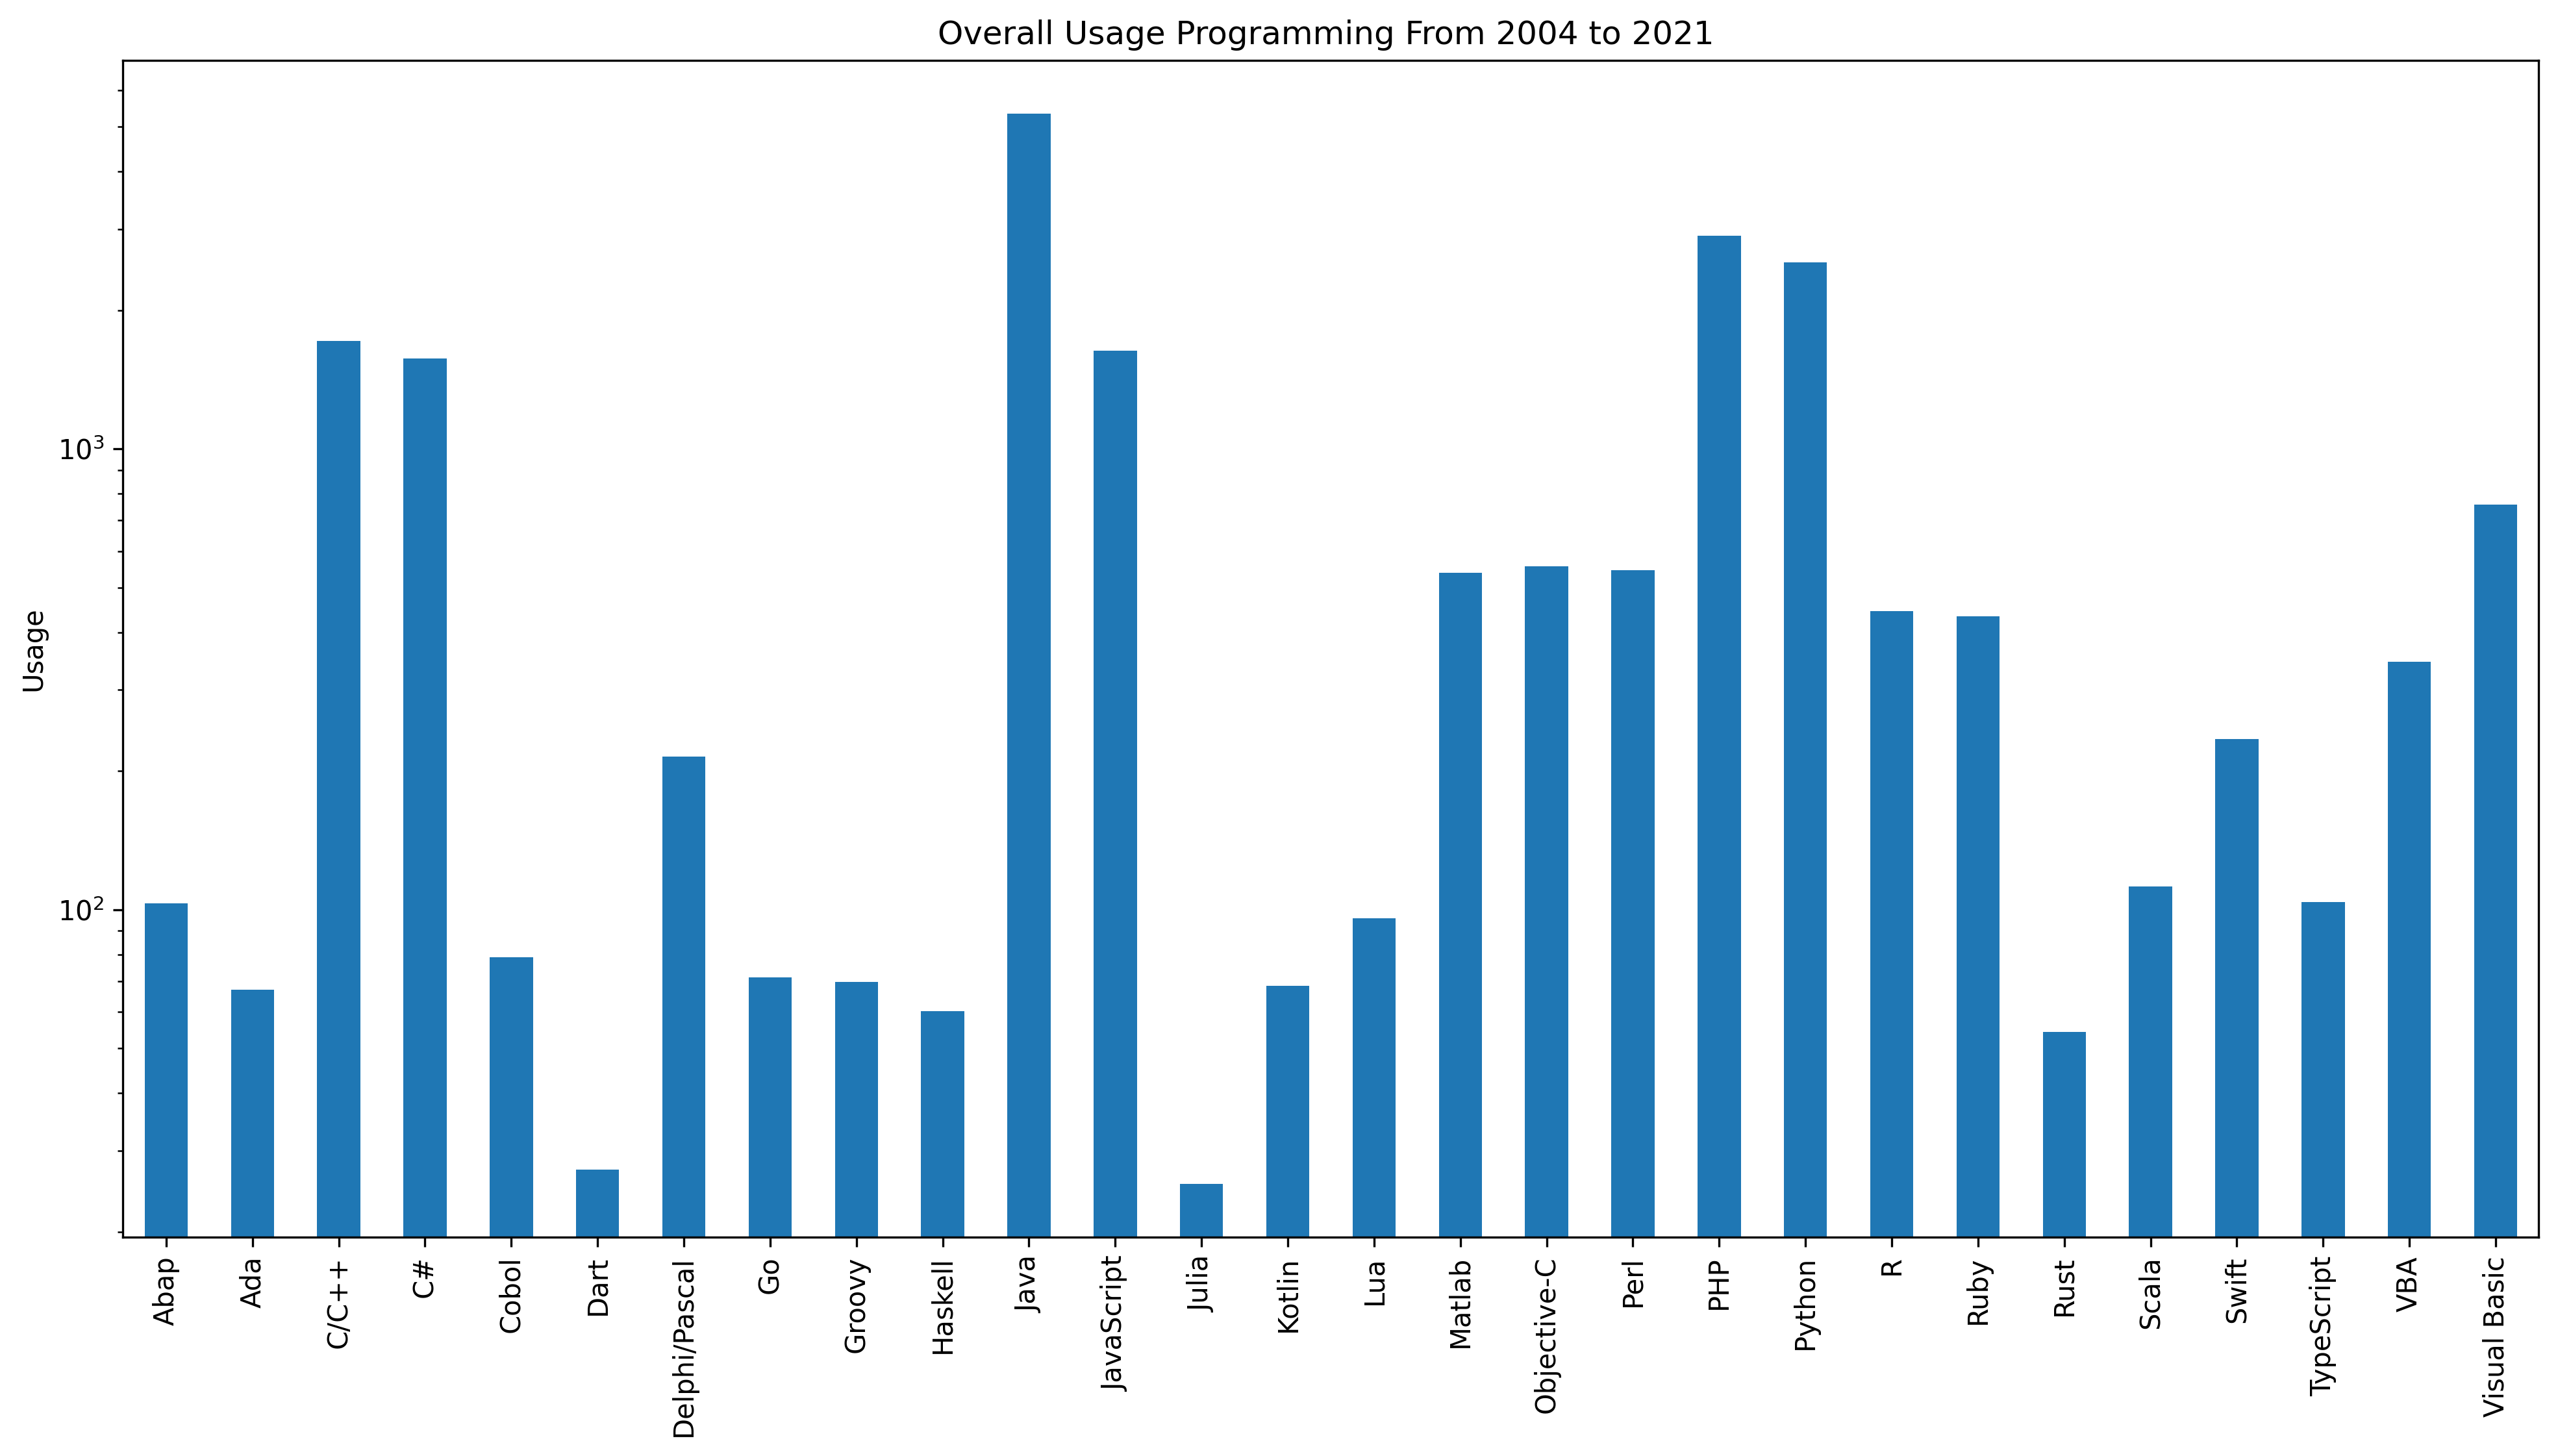

In [90]:
plt.figure(figsize=(16,8), dpi=300)
plt.ylabel("Usage")
ax = plt.gca()
ax.set_yscale('log')
k.plot(kind="bar", title="Overall Usage Programming From 2004 to 2021 ")



Text(0.5, 0, 'Usage')

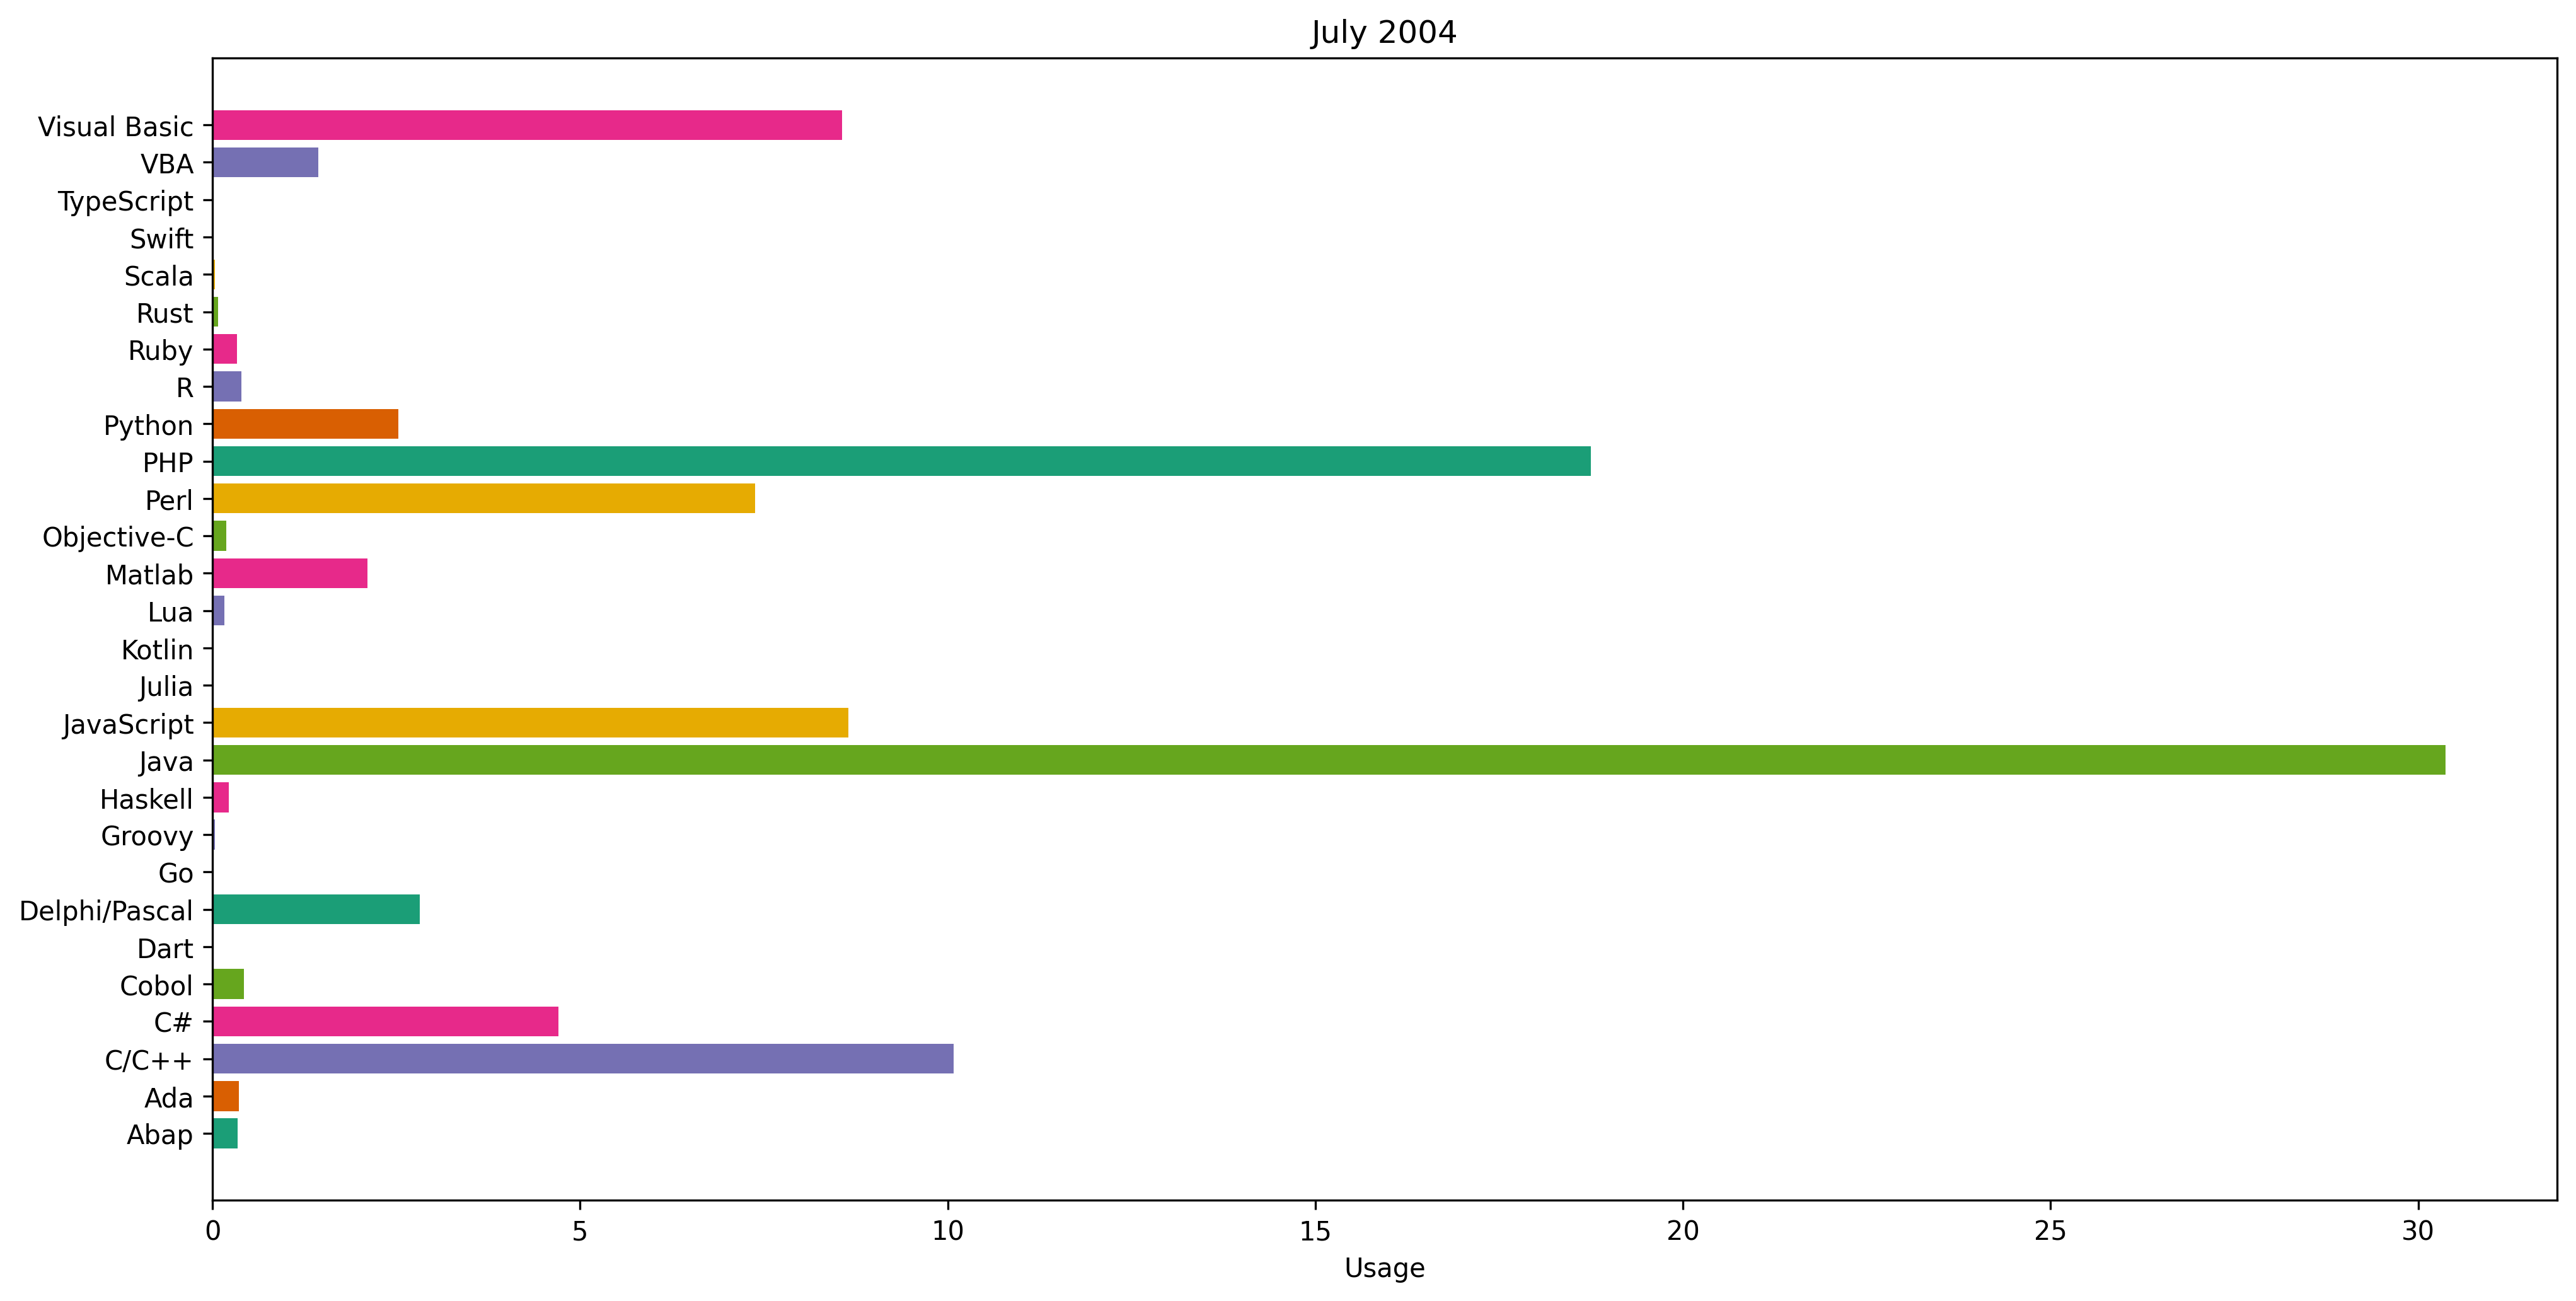

In [ ]:
# July 2004
fig, ax = plt.subplots(figsize=(16, 8), dpi=300)
colors = plt.cm.Dark2(range(6))
y = i.index
width = i.values

ax.barh(y=y, width=width, color=colors);
plt.title('July 2004')
plt.xlabel("Usage")


Text(0.5, 0, 'Usage')

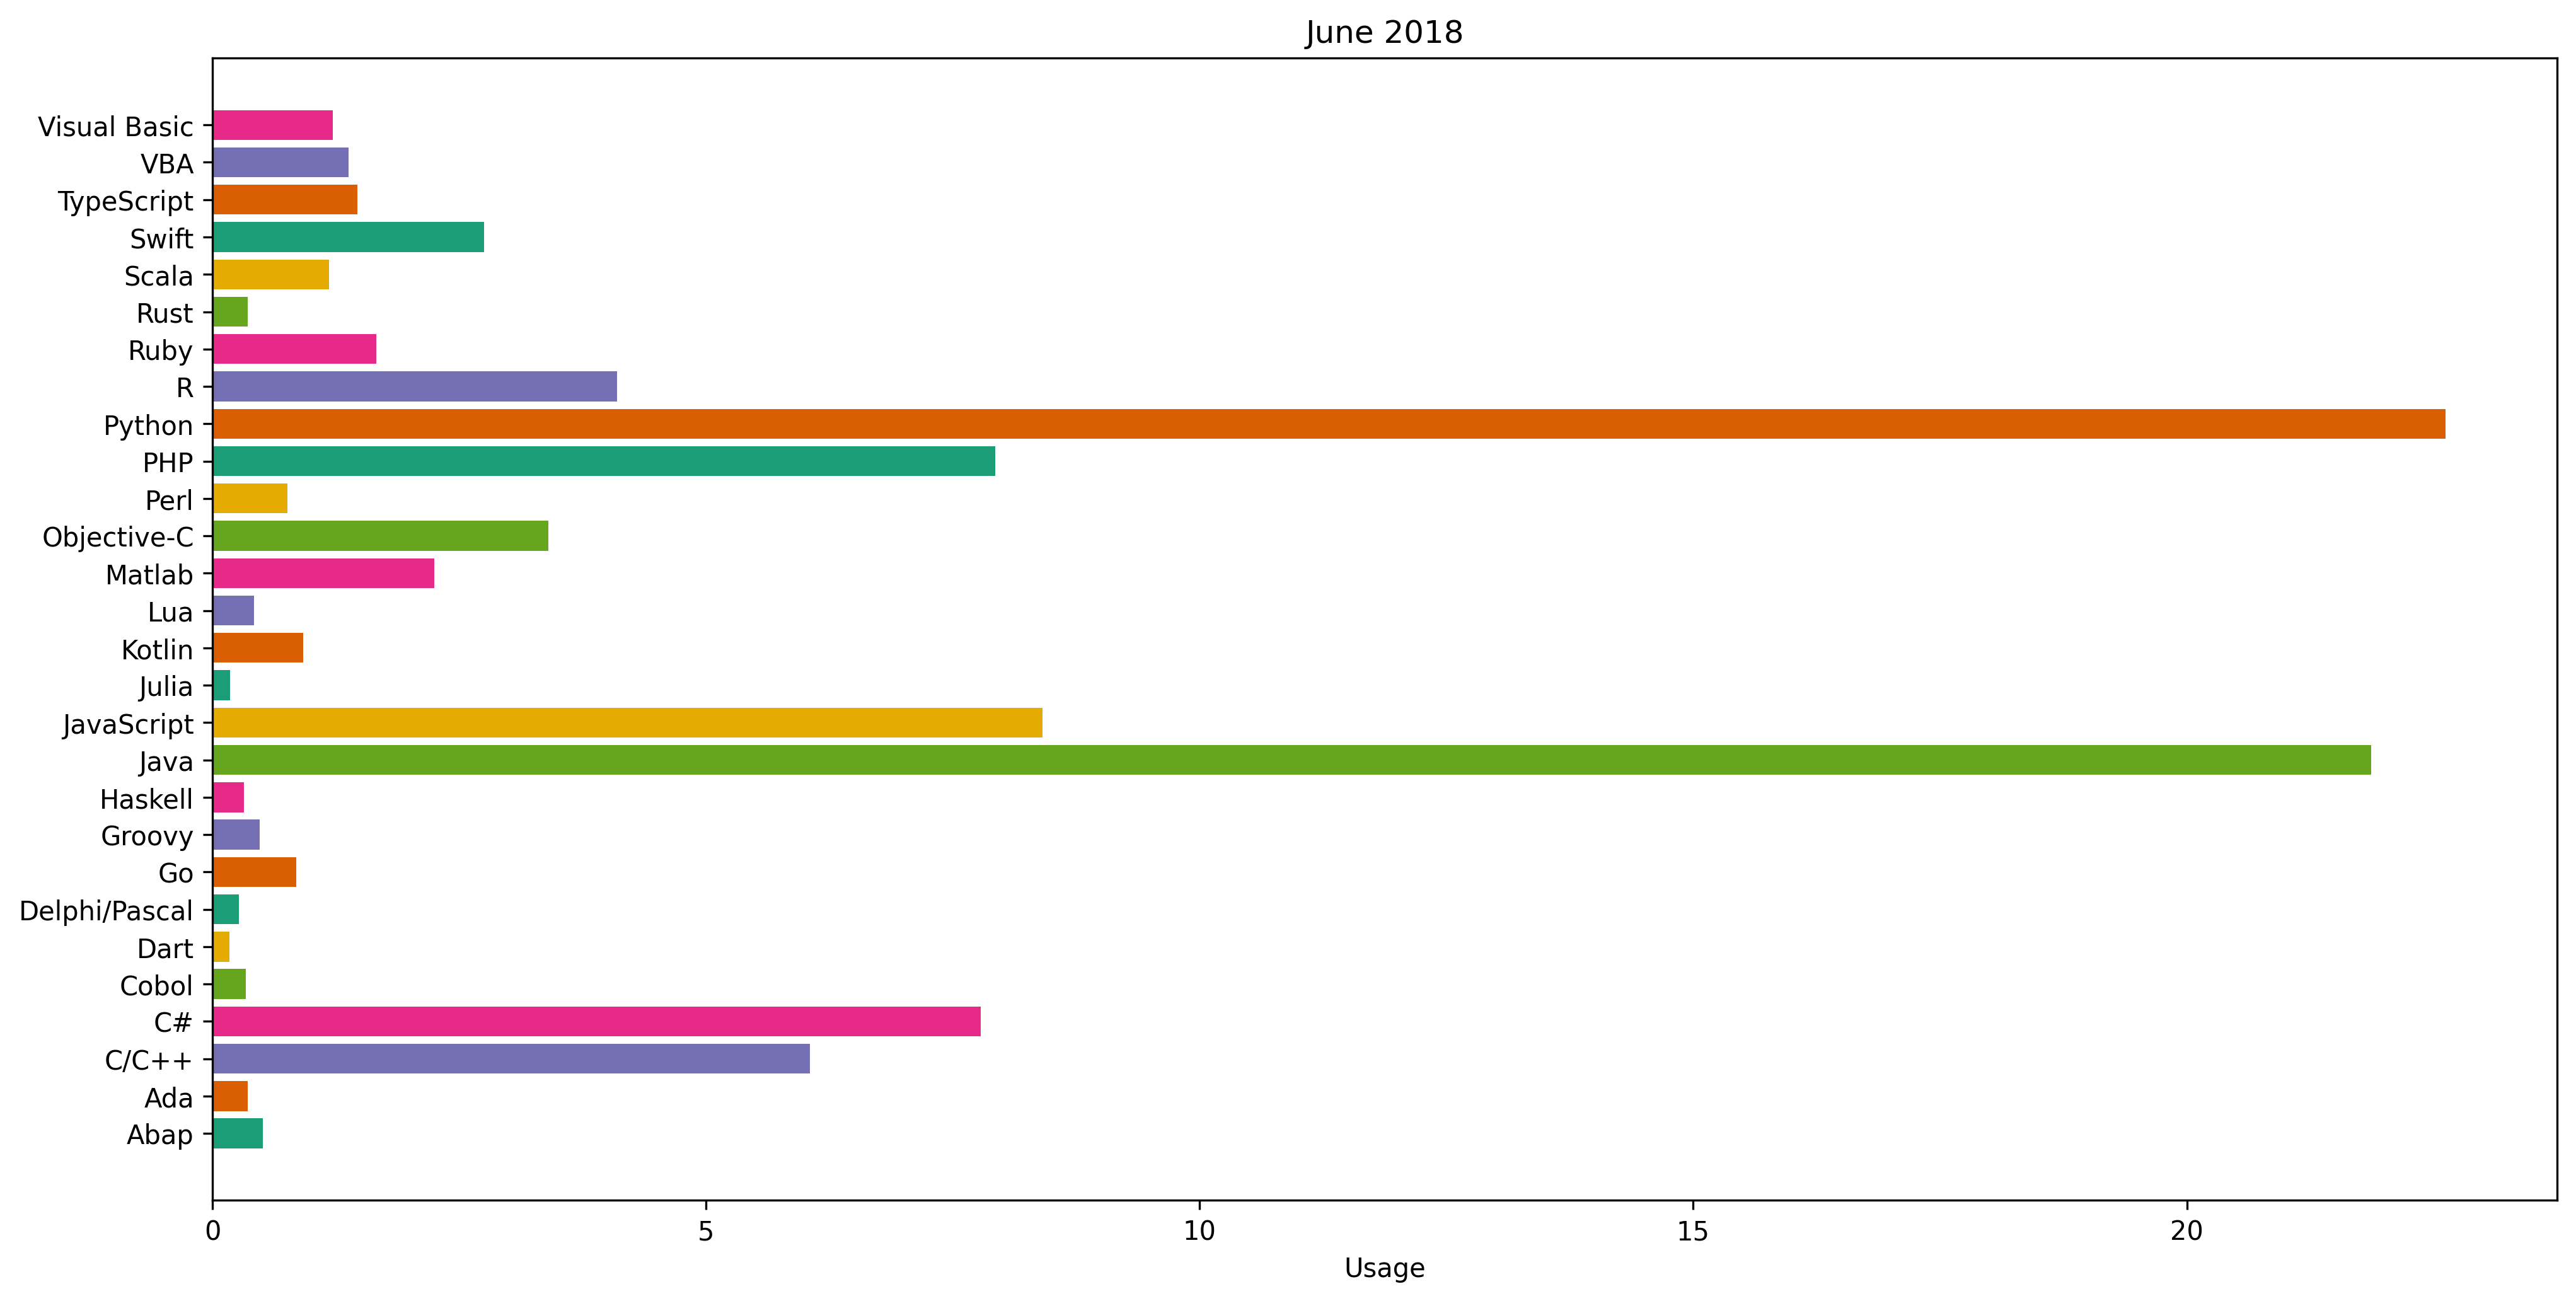

In [ ]:
# June 2018
fig, ax = plt.subplots(figsize=(16, 8), dpi=300)
colors = plt.cm.Dark2(range(6))
y = j.index
width = j.values
ax.barh(y=y, width=width, color=colors);
plt.title('June 2018')
plt.xlabel("Usage")

Text(0.5, 0, 'Usage')

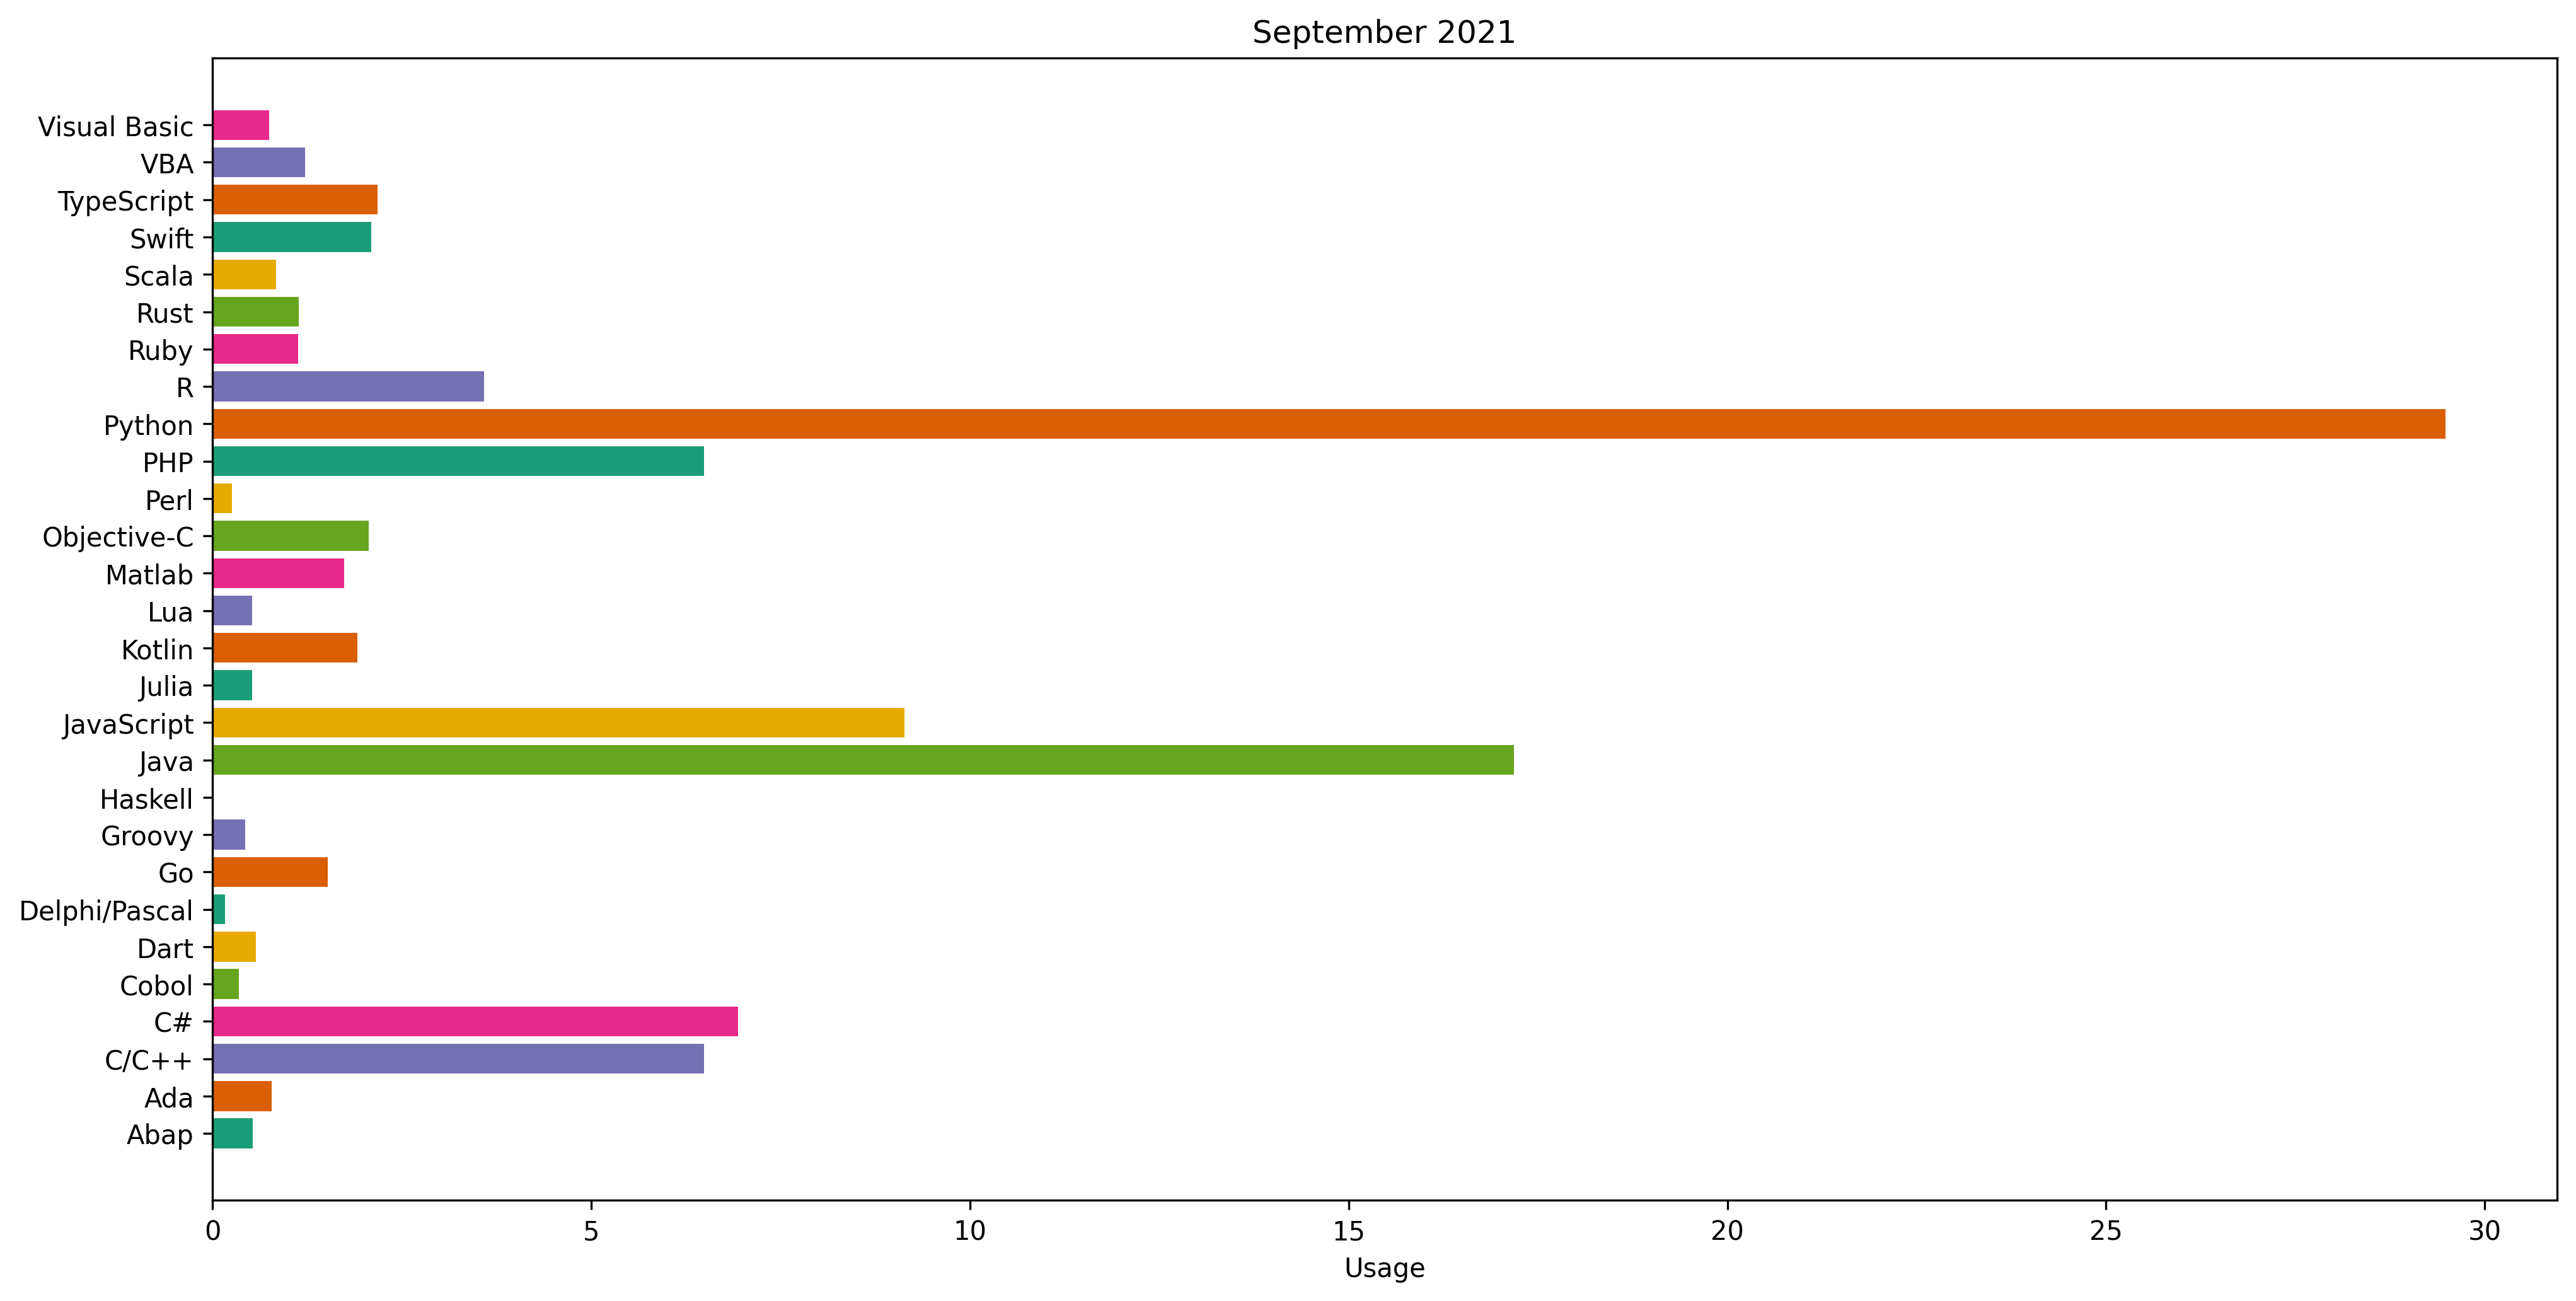

In [ ]:
# September 2021
fig, ax = plt.subplots(figsize=(16, 8), dpi=300)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);
plt.title('September 2021')
plt.xlabel("Usage")



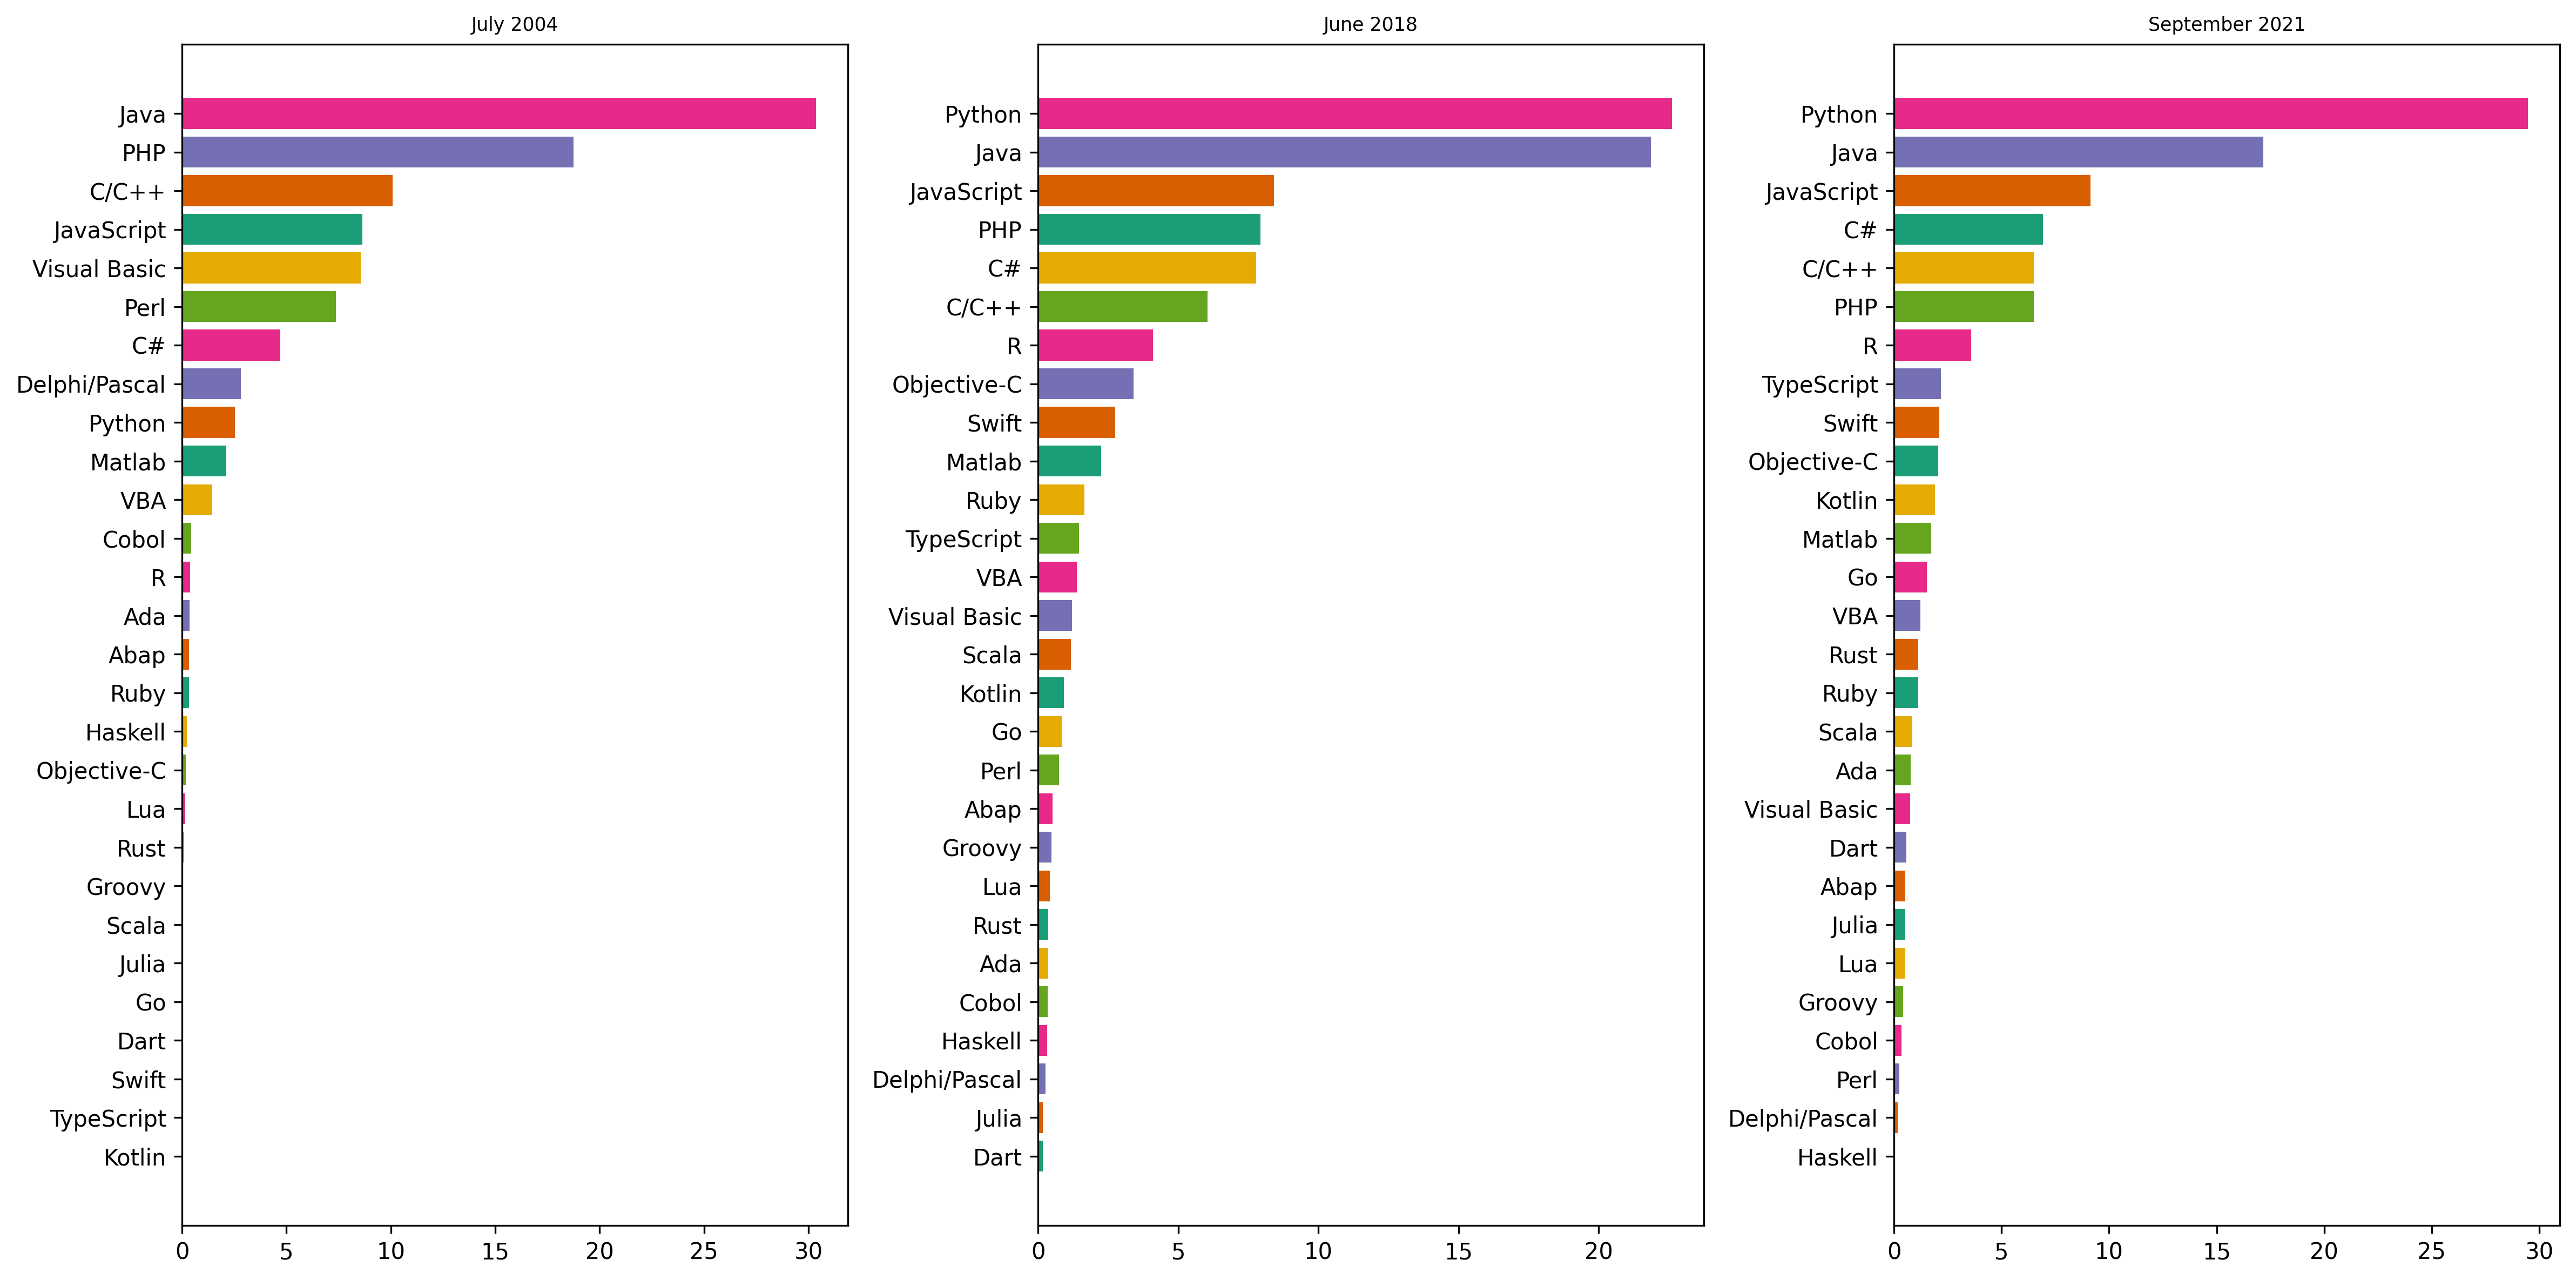

In [ ]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), dpi=300, tight_layout=True)
dates = ['July 2004', 'June 2018', 'September 2021']
for ax, date in zip(ax_array, dates):
    s = df.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
  

No handles with labels found to put in legend.


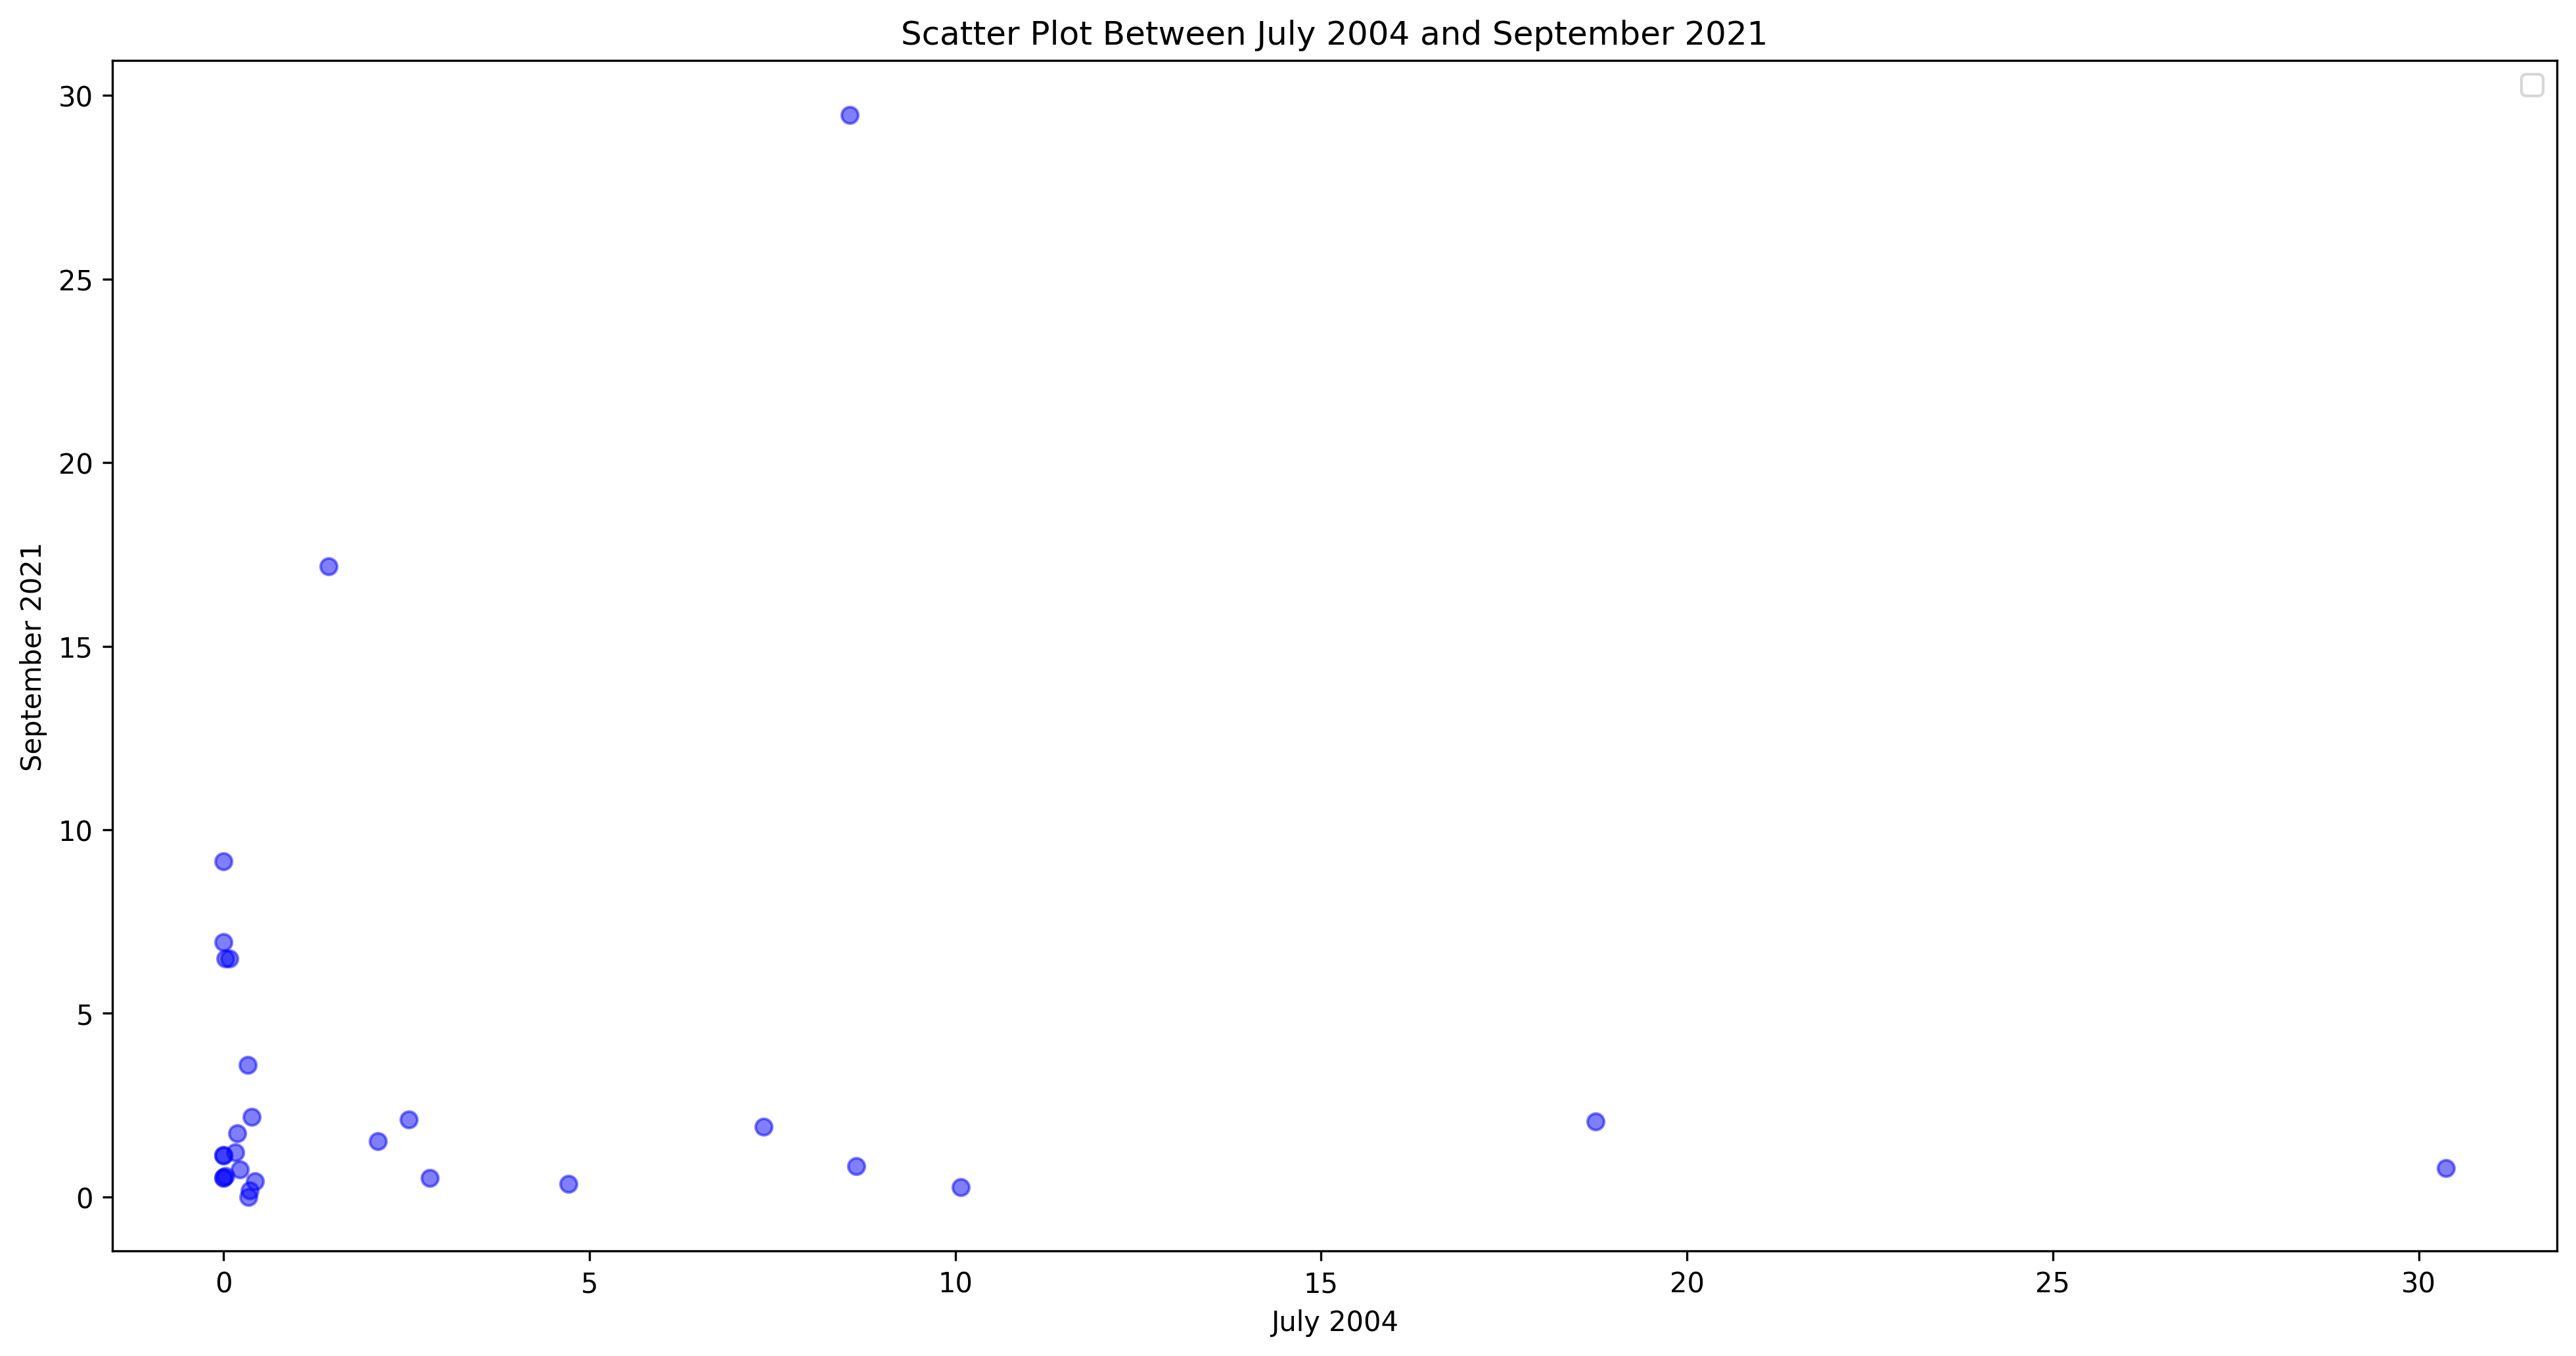

In [ ]:
plt.figure(figsize=(16,8), dpi=300)
x=i
y=s
plt.scatter(x,y,c="blue",alpha=0.5)

plt.xlabel('July 2004')
plt.ylabel('September 2021')
plt.title("Scatter Plot Between July 2004 and September 2021")
plt.legend()
plt.show()



(array([17.,  7.,  7., 20.,  8.,  9., 30., 24., 35., 50.]),
 array([16.34 , 17.786, 19.232, 20.678, 22.124, 23.57 , 25.016, 26.462,
        27.908, 29.354, 30.8  ]),
 <a list of 10 Patch objects>)

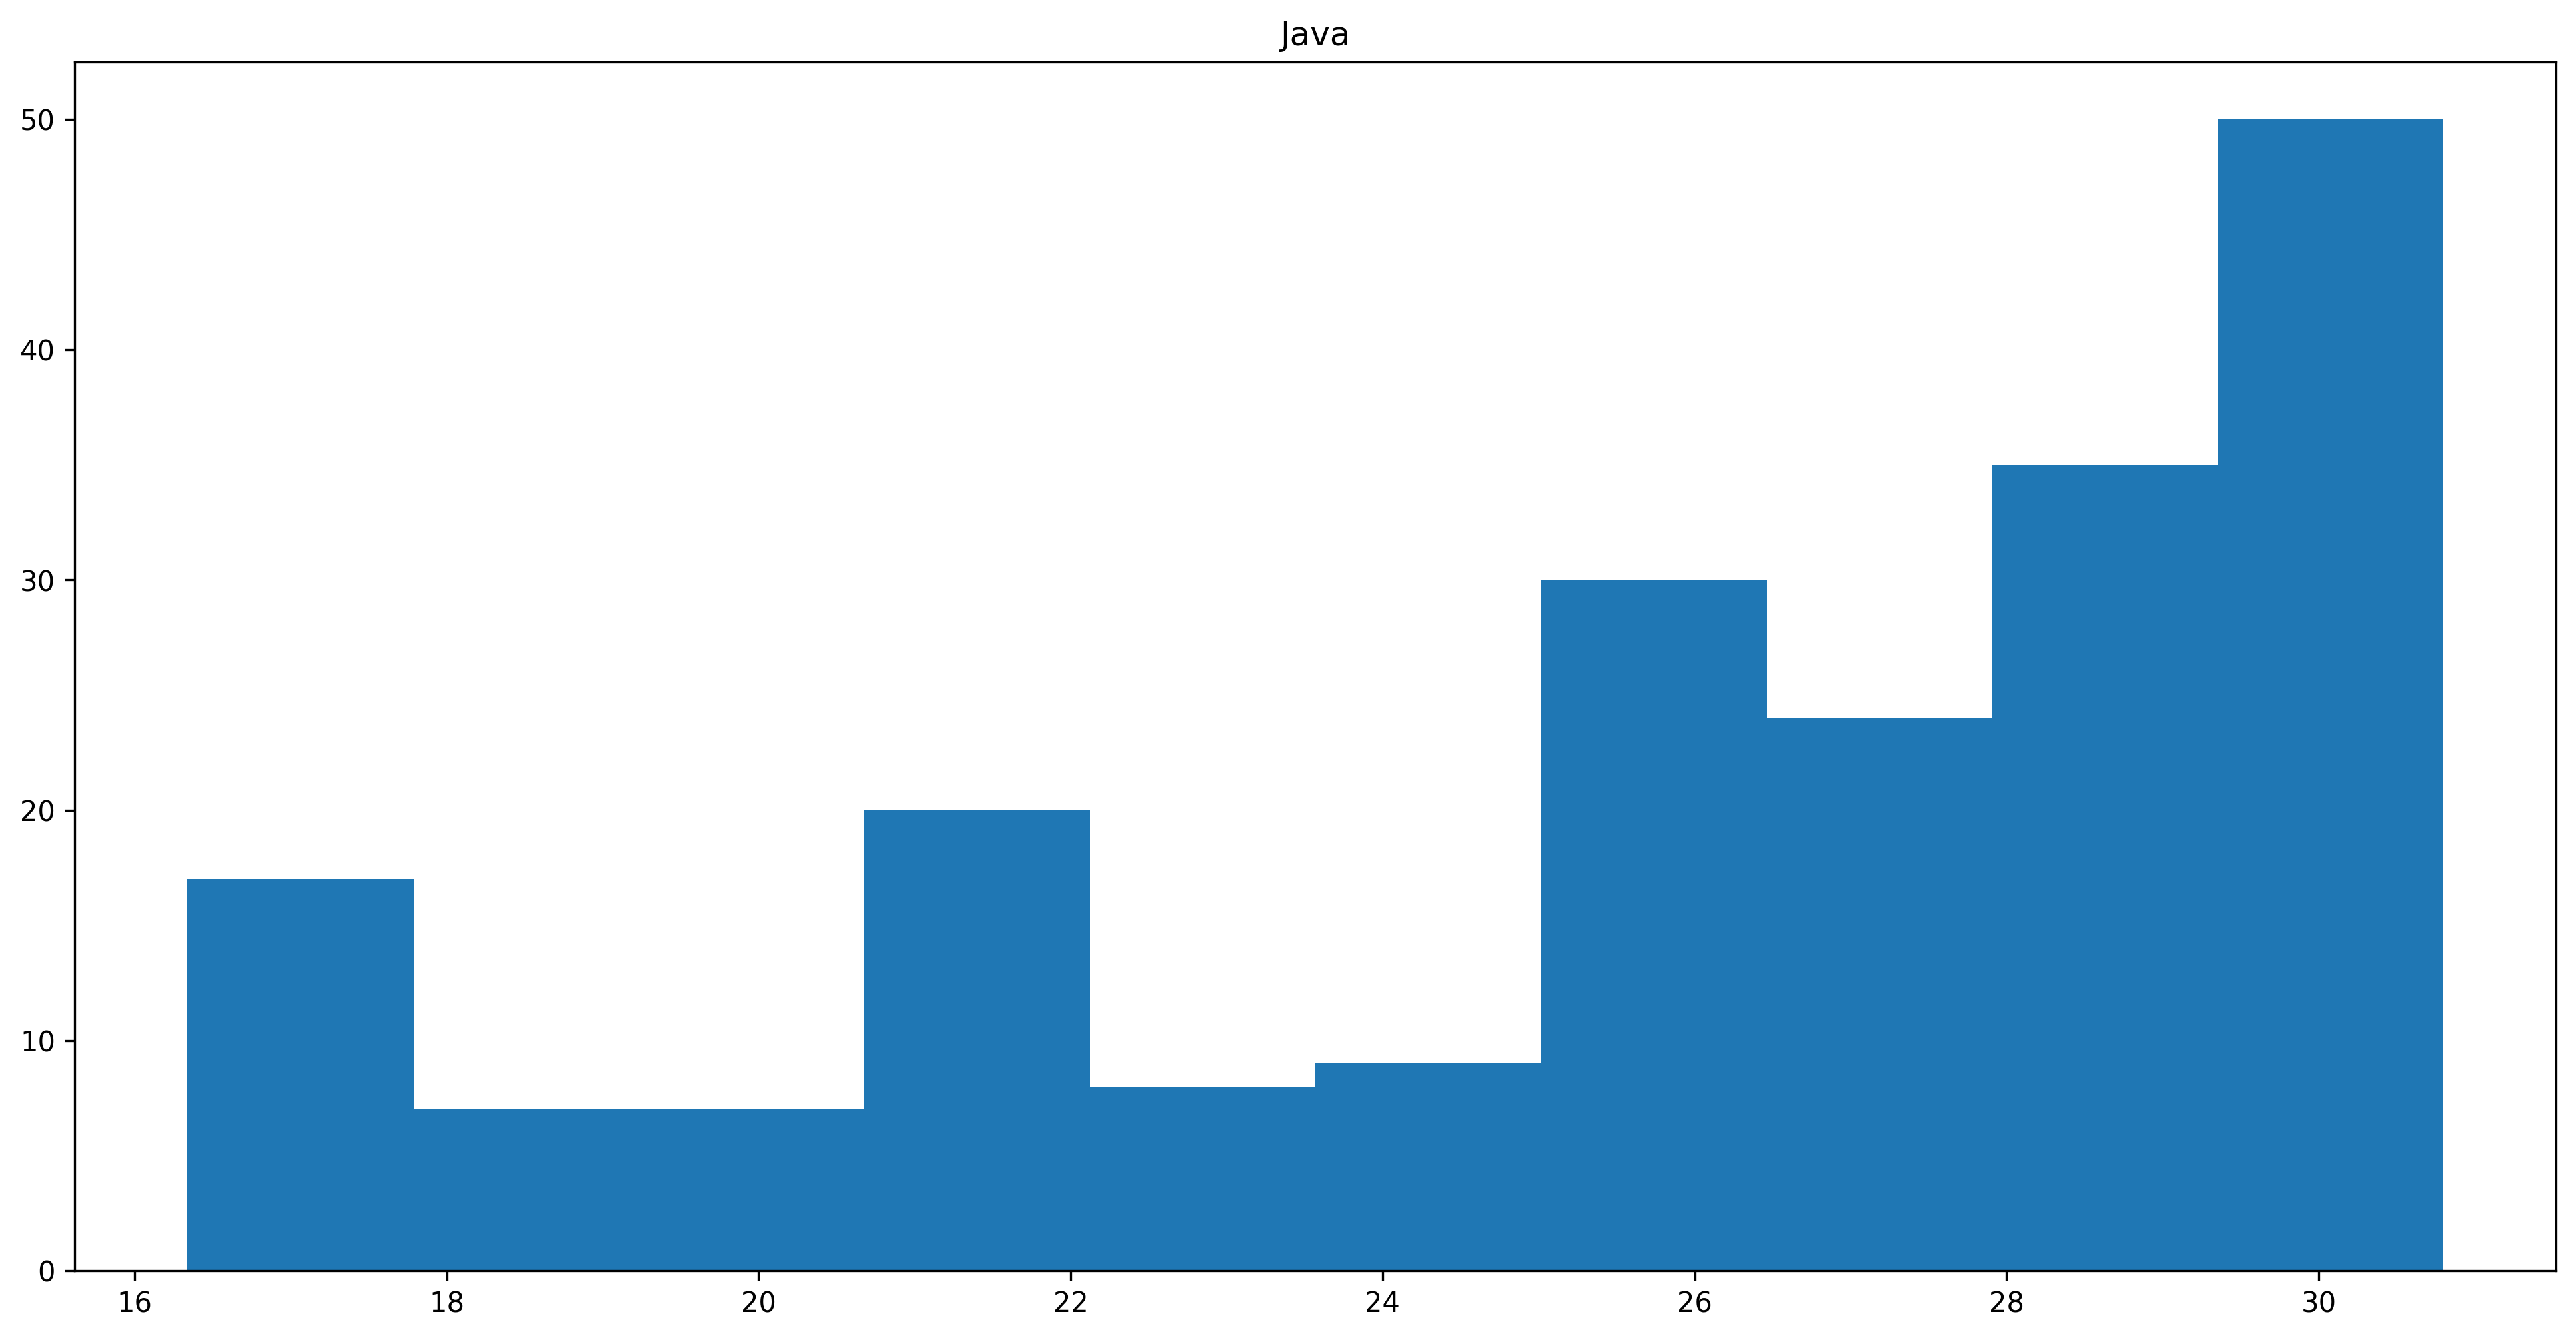

In [ ]:
plt.figure(figsize=(16,8), dpi=300)
plt.title("Java")
plt.hist(df.Java)



(array([51., 51., 32., 14.,  8.,  7.,  6.,  7., 10., 21.]),
 array([ 2.53 ,  5.488,  8.446, 11.404, 14.362, 17.32 , 20.278, 23.236,
        26.194, 29.152, 32.11 ]),
 <a list of 10 Patch objects>)

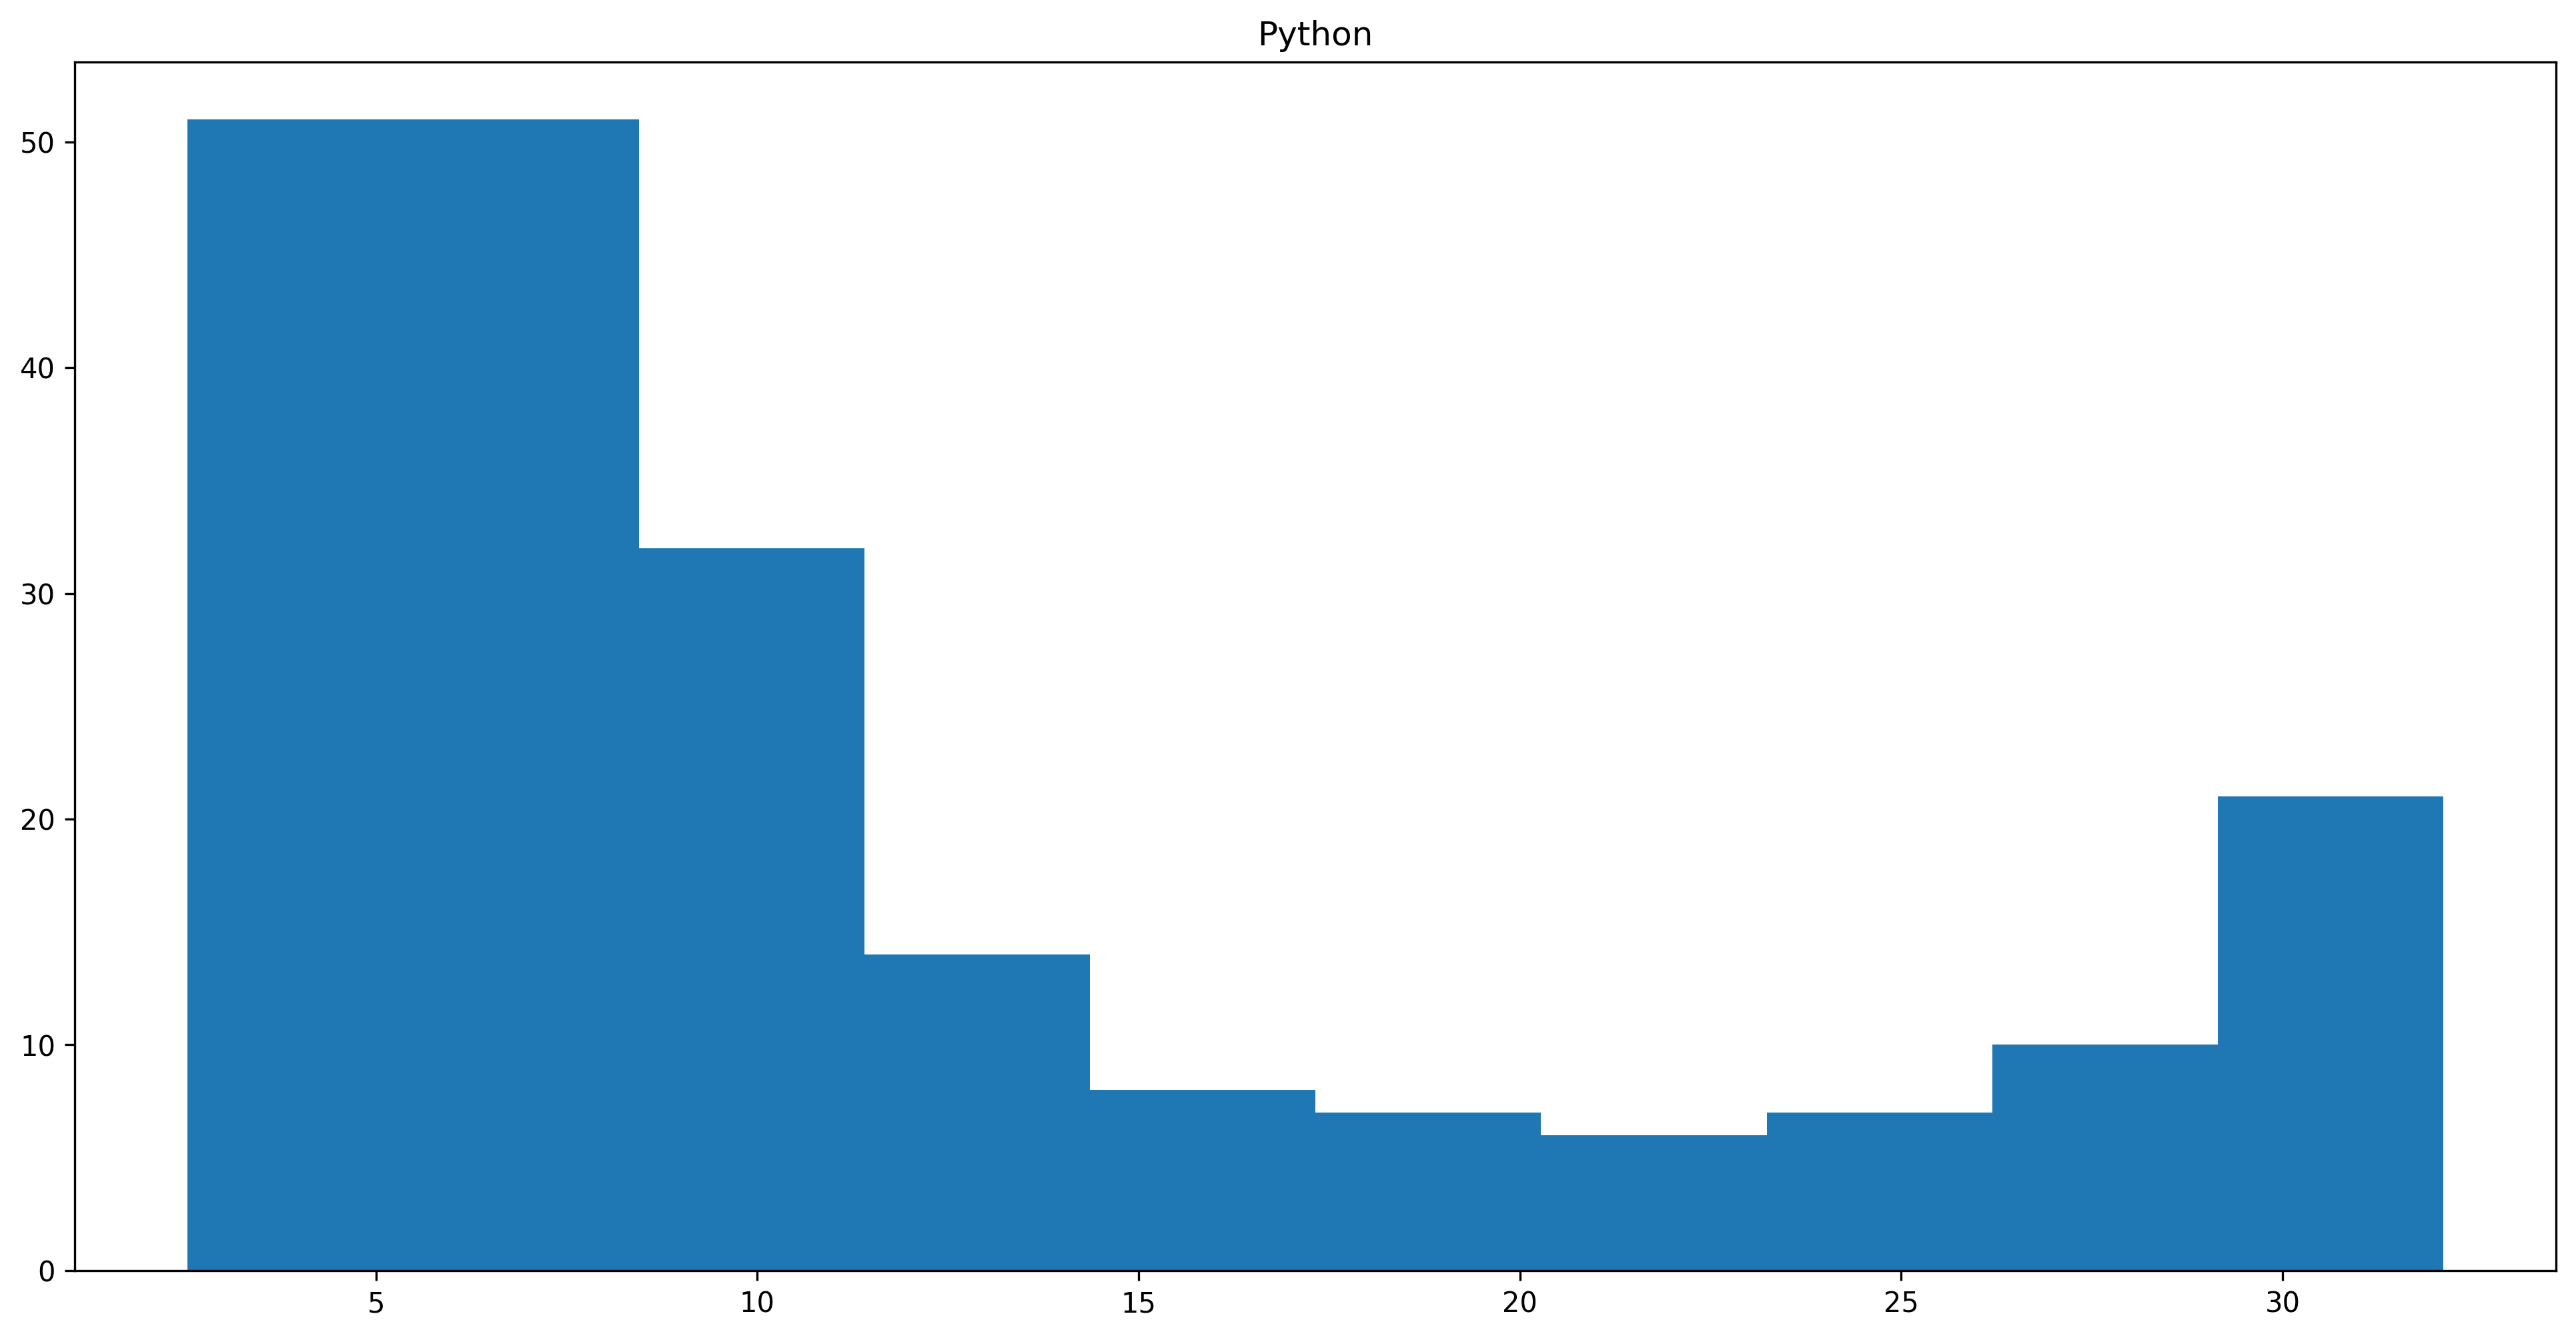

In [ ]:
plt.figure(figsize=(16,8), dpi=300)
plt.title("Python")
plt.hist(df.Python)


In [ ]:
bcr.bar_chart_race(df=df, title="Most Popular Programming 2004-2021")

In [ ]:
bcr.bar_chart_race(
    df=df,
    orientation='v',
    sort='asc',
    n_bars=26,
    title='Most Popular Programming 2004-2021')

In conclusion, we can see that over from 2004 to 2021, programmer use Java the most until June 2018 Python has become the top programming language until nowadays. 